In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [199]:
# Replace 'your_dataset.csv' with the path to your CSV file
data = pd.read_csv('Heart_Disease_Dataset.csv')
data.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [200]:
data_length = data.shape[0]
print(f'length of data : {data_length} samples total')

length of data : 1190 samples total


In [201]:
missing_values_in_rows = data.isnull().any(axis=1)

print(f'there is {data[missing_values_in_rows].shape[0]} rows with some missing features')

there is 0 rows with some missing features


In [202]:
target_counts = data['target'].value_counts()

print(f'It can be seen that the data includes {target_counts[0]} samples from class 0 and {target_counts[1]} samples from class 1')
if np.abs(target_counts[0] / data_length - 0.5) > 0.1:
    print('so dataset seems a bit biased')
else:
    adj = 'quite' if np.abs(target_counts[0] / data_length - 0.5) < 0.01 else 'nearly'
    print(f'so its {adj} balanced!') 

It can be seen that the data includes 561 samples from class 0 and 629 samples from class 1
so its nearly balanced!


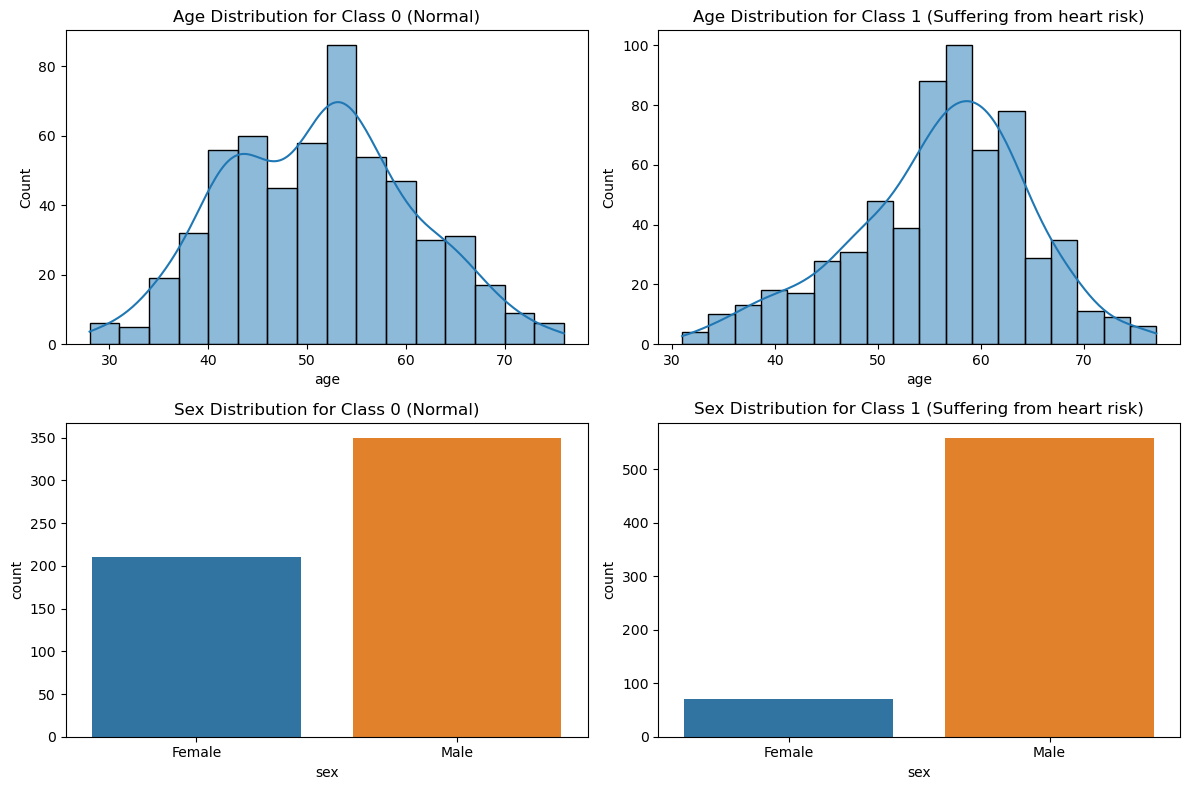

In [203]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data[data['target'] == 0]['age'], kde=True)
plt.title('Age Distribution for Class 0 (Normal)')

plt.subplot(2, 2, 2)
sns.histplot(data[data['target'] == 1]['age'], kde=True)
plt.title('Age Distribution for Class 1 (Suffering from heart risk)')

plt.subplot(2, 2, 3)
ax = sns.countplot(data=data[data['target'] == 0], x='sex')
ax.set_xticklabels(['Female', 'Male'])
plt.title('Sex Distribution for Class 0 (Normal)')

plt.subplot(2, 2, 4)
ax = sns.countplot(data=data[data['target'] == 1], x='sex')
ax.set_xticklabels(['Female', 'Male'])
plt.title('Sex Distribution for Class 1 (Suffering from heart risk)')

plt.tight_layout()
plt.show()


In [204]:
z_score_threshold = 3

outliers = None
for col in data.columns[:-1]:

    z_scores = np.abs(stats.zscore(data[col]))
    outliers = pd.concat([outliers, data[z_scores > z_score_threshold]], axis=0)
    data = data[z_scores <= z_score_threshold]
    
data_length = data.shape[0]
print(f'{outliers.shape[0]} samples have been removed and data length now is {data_length} samples')
print('outliers: ')
outliers

28 samples have been removed and data length now is 1162 samples
outliers: 


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
109,39,1,2,190,241,0,0,106,0,0.0,1,0
242,54,1,4,200,198,0,0,142,1,2.0,2,1
366,64,0,4,200,0,0,0,140,1,1.0,2,1
400,61,1,3,200,0,1,1,70,0,0.0,2,1
450,55,1,3,0,0,0,0,155,0,1.5,2,1
593,61,1,4,190,287,1,2,150,1,2.0,3,1
734,56,0,4,200,288,1,2,133,1,4.0,3,1
761,54,1,2,192,283,0,2,195,0,0.0,1,1
1013,56,0,4,200,288,1,2,133,1,4.0,3,1
1075,54,1,2,192,283,0,2,195,0,0.0,1,1


In [205]:
scaler = StandardScaler()

# Fit and transform the numerical columns
data[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']] = scaler.fit_transform(data[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']])


In [206]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [207]:
classifiers = {
    'Linear SVM': SVC(kernel='linear', C=1.0),
    'RBF SVM': SVC(kernel='rbf', C=10.0, gamma=1.0),
    'Polynomial SVM': SVC(kernel='poly', C=3.3, degree=8)
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy*100:.2f}%')
    print(f'Precision: {precision*100:.2f}%')
    print(f'Recall: {recall*100:.2f}%')
    print(f'F1-Score: {f1*100:.2f}%', end='\n\n')

Linear SVM Metrics:
Accuracy: 82.81%
Precision: 80.40%
Recall: 88.40%
F1-Score: 84.21%

RBF SVM Metrics:
Accuracy: 88.54%
Precision: 82.19%
Recall: 99.45%
F1-Score: 90.00%

Polynomial SVM Metrics:
Accuracy: 87.68%
Precision: 88.33%
Recall: 87.85%
F1-Score: 88.09%

